目的：把输入的图片聚成2，4，8，16，32，64类

1. 导入模块

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. 准备输入的数据

In [2]:
#读取原始图像
img = cv2.imread('lenna.png') 
print (img.shape)

#图像二维像素转换为一维
data = img.reshape((-1,3))
data = np.float32(data)

(512, 512, 3)


3. 设置参数，进行K-Means聚类

In [3]:
#停止条件 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成2类
compactness, labels2, centers2 = cv2.kmeans(data, 2, None, criteria, 10, flags)

#K-Means聚类 聚集成4类
compactness, labels4, centers4 = cv2.kmeans(data, 4, None, criteria, 10, flags)

#K-Means聚类 聚集成8类
compactness, labels8, centers8 = cv2.kmeans(data, 8, None, criteria, 10, flags)

#K-Means聚类 聚集成16类
compactness, labels16, centers16 = cv2.kmeans(data, 16, None, criteria, 10, flags)

#K-Means聚类 聚集成64类
compactness, labels64, centers64 = cv2.kmeans(data, 64, None, criteria, 10, flags)

4. 将数据转换成图片

In [4]:
#图像转换回uint8二维类型
centers2 = np.uint8(centers2)
res = centers2[labels2.flatten()]
dst2 = res.reshape((img.shape))

centers4 = np.uint8(centers4)
res = centers4[labels4.flatten()]
dst4 = res.reshape((img.shape))

centers8 = np.uint8(centers8)
res = centers8[labels8.flatten()]
dst8 = res.reshape((img.shape))

centers16 = np.uint8(centers16)
res = centers16[labels16.flatten()]
dst16 = res.reshape((img.shape))

centers64 = np.uint8(centers64)
res = centers64[labels64.flatten()]
dst64 = res.reshape((img.shape))

#图像转换为RGB显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
dst4 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
dst8 = cv2.cvtColor(dst8, cv2.COLOR_BGR2RGB)
dst16 = cv2.cvtColor(dst16, cv2.COLOR_BGR2RGB)
dst64 = cv2.cvtColor(dst64, cv2.COLOR_BGR2RGB)

5. 绘制可视化图像

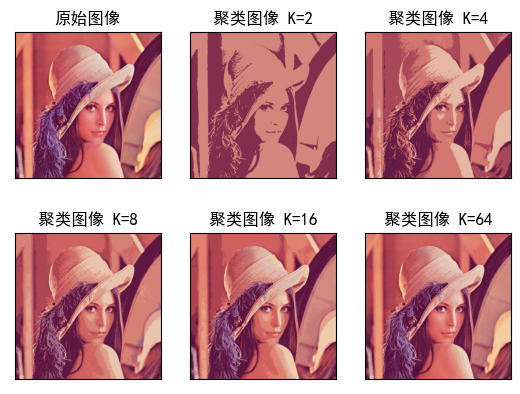

In [5]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'原始图像', u'聚类图像 K=2', u'聚类图像 K=4',
          u'聚类图像 K=8', u'聚类图像 K=16',  u'聚类图像 K=64']  
images = [img, dst2, dst4, dst8, dst16, dst64]  
for i in range(6):  
   plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()